In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

17465344/17464789 [==============================] - 0s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\BIT\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\BIT\anaconda3\envs\tf-env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [4]:
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [9]:
model = models.Sequential()
model.add(layers.Embedding(5000, 100))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 5, padding = 'valid', activation='relu', strides=1))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.LSTM(55))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [13]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [14]:
history = model.fit(X_train, y_train, batch_size=100, epochs=5,
                   validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 14s 55ms/step - loss: 0.4485 - accuracy: 0.7740 - val_loss: 0.3674 - val_accuracy: 0.8378
Epoch 2/5
250/250 [==============================] - 13s 52ms/step - loss: 0.2960 - accuracy: 0.8754 - val_loss: 0.3338 - val_accuracy: 0.8552
Epoch 3/5
250/250 [==============================] - 13s 52ms/step - loss: 0.2537 - accuracy: 0.8942 - val_loss: 0.3249 - val_accuracy: 0.8600
Epoch 4/5
250/250 [==============================] - 13s 54ms/step - loss: 0.2162 - accuracy: 0.9156 - val_loss: 0.3280 - val_accuracy: 0.8554
Epoch 5/5
250/250 [==============================] - 14s 54ms/step - loss: 0.1800 - accuracy: 0.9328 - val_loss: 0.3492 - val_accuracy: 0.8548


In [15]:
print('Test Accuracy : %4.f' %(model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3492 - accuracy: 0.8548
Test Accuracy :    1


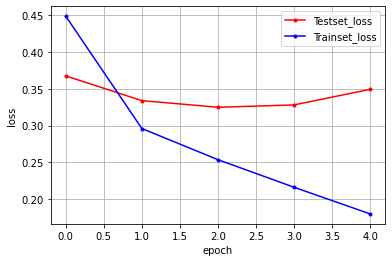

In [16]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [19]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

NameError: name 'autoencoder' is not defined